<a href="https://colab.research.google.com/github/RassCrom/GISC606AB/blob/main/NDWI_for_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

In [2]:
import glob
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file_pattern = "/content/sentinel_data/*.tif"
images = glob.glob(file_pattern)
images.sort()

In [7]:
images

['/content/sentinel_data/T12SVC_20230623T175911_B02_20m.tif',
 '/content/sentinel_data/T12SVC_20230623T175911_B03_20m.tif',
 '/content/sentinel_data/T12SVC_20230623T175911_B04_20m.tif',
 '/content/sentinel_data/T12SVC_20230623T175911_B11_20m.tif',
 '/content/sentinel_data/T12SVC_20230623T175911_B8A_20m.tif']

In [8]:
normalized_images = []
for image in images:
  with rasterio.open(image) as dataset:
    band = dataset.read(1).astype('float32')
    band_min, band_max = band .min(), band .max()
    normalized_band = (band - band_min) / (band_max - band_min)
    normalized_band[normalized_band==0] = None
    normalized_images.append(normalized_band)

In [9]:
layer_stack = np.stack(normalized_images, axis=0)

In [10]:
with rasterio.open(images[0]) as src:
  meta = src.meta.copy()
meta.update(count=layer_stack.shape[0], dtype='float32')

In [11]:
with rasterio.open("/content/sentinel_data/layer_stacked.tif", 'w', **meta) as src:
  src.write(layer_stack)

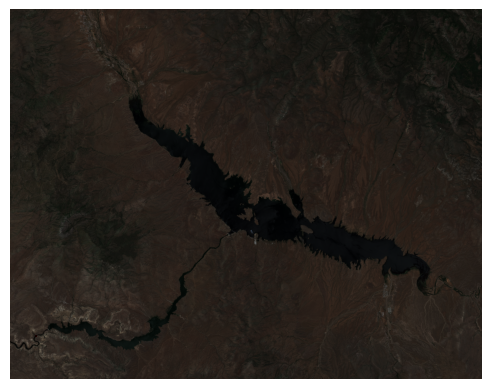

In [12]:
with rasterio.open("/content/sentinel_data/layer_stacked.tif") as image_ls:
  r = image_ls.read(3)
  g = image_ls.read(2)
  b = image_ls.read(1)
  rgb = np.dstack((r,g,b))
  plt.imshow(rgb)
  plt.axis('off')  # Remove axis ticks
  plt.show()

In [13]:
with rasterio.open("/content/sentinel_data/layer_stacked.tif") as image_ls:
  meta = image_ls.meta.copy()
  meta.update(count=1,dtype='float32')
  red = image_ls.read(2)
  nir = image_ls.read(4)
  ndvi = np.where((nir + red) == 0, np.nan, (nir - red) / (nir + red))
  with rasterio.open("/content/sentinel_data/layer_stacked_ndwi.tif", 'w', **meta) as dst:
    dst.write(ndvi, 1)

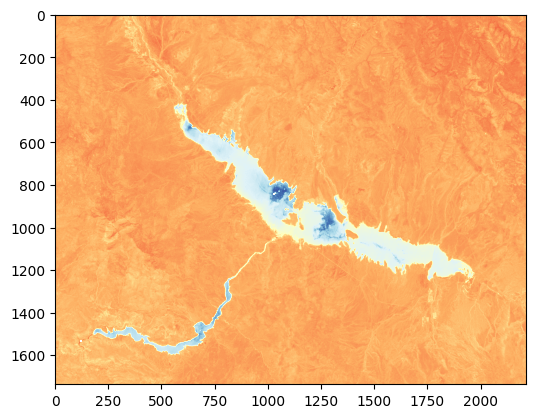

In [15]:
with rasterio.open("/content/sentinel_data/layer_stacked_ndwi.tif") as src:
  show(src.read(1), cmap='RdYlBu_r')